In [51]:
import pandas as pd
import geopandas as gpd
import pycountry
from fuzzywuzzy import process

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
wiliam = pd.read_csv('WILIAM_regions.csv')
wiliam['Regions'] = wiliam['Regions'].str.strip()
wiliam

,Regions,WILIAM
0,Austria,AUSTRIA
1,Belgium,BELGIUM
2,Bulgaria,BULGARIA
3,Croatia,CROATIA
4,Cyprus,CYPRUS
5,Czechia,CZECHIA
6,Denmark,DENMARK
7,Estonia,ESTONIA
8,Finland,FINLAND
9,France,FRANCE


In [9]:
fund = pd.read_csv('FUND_regions.csv')

fund['Countries'] = fund['Countries'].str.split(',')
fund_exploded = fund.explode('Countries')
fund_exploded['Countries'] = fund_exploded['Countries'].str.strip()
fund_exploded

,Code,Name,Countries
0,USA,USA,United States of America
1,CAN,Canada,Canada
2,WEU,Western Europe,Andorra
2,WEU,Western Europe,Austria
2,WEU,Western Europe,Belgium
...,...,...,...
15,SIS,Small Island States,Tonga
15,SIS,Small Island States,Trinidad and Tobago
15,SIS,Small Island States,Tuvalu
15,SIS,Small Island States,Vanuatu


In [64]:
list = [country.name for country in pycountry.countries]   
list

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'French Southern Territories',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Bonaire, Sint Eustatius and Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Saint Barthélemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Cocos (Keeling) Islands',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Congo, The Democratic Republic of the',
 'Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Christmas Island',
 'Cayman Islands',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica'

In [58]:
rows_with_na = fund_exploded[fund_exploded['ISO'].isna()]
mismatch = rows_with_na['Countries'].values

all_country_names = [country.name for country in pycountry.countries]

def get_best_match(country_name):
    best_match, score = process.extractOne(country_name, all_country_names)
    return best_match if score > 80 else None

# Get the ISO codes for the non-matching countries
fuzzy_matches = {country: get_iso_code(get_best_match(country)) for country in mismatch}

fuzzy_matches

{'FYR Macedonia': None,
 'Yugoslavia': 'LVA',
 'Turkey': None,
 'West Bank and Gaza': 'BES',
 'Brunei': 'BRN',
 'East Timor': 'TLS',
 'Macau': None,
 'Cape Verde': None,
 'Congo-Brazzaville': 'COG',
 'Congo-Kinshasa': 'COG',
 'Cote d’Ivoire': 'CIV',
 'Guinea- Bissau': 'GNB',
 'Swaziland': None,
 'Micronesia': 'FSM',
 'Netherlands Antilles': 'NLD',
 'Reunion': 'REU',
 'St Kitts and Nevis': 'KNA',
 'St Lucia': 'LCA',
 'St Vincent and Grenadines': 'VCT',
 'Virgin Islands': 'VIR'}

In [69]:

def get_iso_code(country_name):
    if country_name == 'Russia':
        country_name = 'Russian Federation'
    elif country_name == 'Turkey':
        country_name = 'Türkiye'
    elif country_name == 'Congo-Kinshasa':
        country_name = 'Congo, The Democratic Republic of the'
    elif country_name == 'Congo-Brazzaville':
        country_name = 'Congo'
    elif country_name == 'Swaziland':
        country_name = 'Eswatini'

    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None
    
def get_iso_code_fuzzy(country_name):

    try:
        return pycountry.countries.lookup(get_best_match(country_name)).alpha_3
    except LookupError:
        return None


fund_exploded['ISO'] = fund_exploded['Countries'].apply(get_iso_code)
fund_exploded['ISO'] = fund_exploded['ISO'].fillna(fund_exploded['Countries'].apply(get_iso_code_fuzzy))
fund_exploded

,Code,Name,Countries,ISO
0,USA,USA,United States of America,USA
1,CAN,Canada,Canada,CAN
2,WEU,Western Europe,Andorra,AND
2,WEU,Western Europe,Austria,AUT
2,WEU,Western Europe,Belgium,BEL
...,...,...,...,...
15,SIS,Small Island States,Tonga,TON
15,SIS,Small Island States,Trinidad and Tobago,TTO
15,SIS,Small Island States,Tuvalu,TUV
15,SIS,Small Island States,Vanuatu,VUT


ALA


In [19]:
correspondance = wiliam.merge(fund_exploded, left_on='Regions', right_on='Countries', how='left')
correspondance = correspondance.rename(columns={'Code': 'FUND'})
correspondance.to_csv('correspondance.csv', index=False)

In [20]:
correspondance

,Regions,WILIAM,FUND,Name,Countries,ISO
0,Austria,AUSTRIA,WEU,Western Europe,Austria,AUT
1,Belgium,BELGIUM,WEU,Western Europe,Belgium,BEL
2,Bulgaria,BULGARIA,CEE,Central and Eastern Europe,Bulgaria,BGR
3,Croatia,CROATIA,CEE,Central and Eastern Europe,Croatia,HRV
4,Cyprus,CYPRUS,WEU,Western Europe,Cyprus,CYP
5,Czechia,CZECHIA,NaN,NaN,NaN,NaN
6,Denmark,DENMARK,WEU,Western Europe,Denmark,DNK
7,Estonia,ESTONIA,FSU,Former Soviet Union,Estonia,EST
8,Finland,FINLAND,WEU,Western Europe,Finland,FIN
9,France,FRANCE,WEU,Western Europe,France,FRA


In [21]:
correspondance.loc['UK', 'FUND'] = 'WEU'
correspondance

,Regions,WILIAM,FUND,Name,Countries,ISO
0,Austria,AUSTRIA,WEU,Western Europe,Austria,AUT
1,Belgium,BELGIUM,WEU,Western Europe,Belgium,BEL
2,Bulgaria,BULGARIA,CEE,Central and Eastern Europe,Bulgaria,BGR
3,Croatia,CROATIA,CEE,Central and Eastern Europe,Croatia,HRV
4,Cyprus,CYPRUS,WEU,Western Europe,Cyprus,CYP
5,Czechia,CZECHIA,NaN,NaN,NaN,NaN
6,Denmark,DENMARK,WEU,Western Europe,Denmark,DNK
7,Estonia,ESTONIA,FSU,Former Soviet Union,Estonia,EST
8,Finland,FINLAND,WEU,Western Europe,Finland,FIN
9,France,FRANCE,WEU,Western Europe,France,FRA


<Axes: >

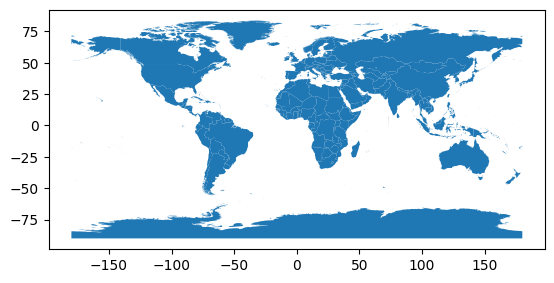

In [22]:
countries = gpd.read_file(r'naturalearthdata\ne_10m_admin_0_countries.shp')
countries.plot()

In [14]:
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


<Axes: >

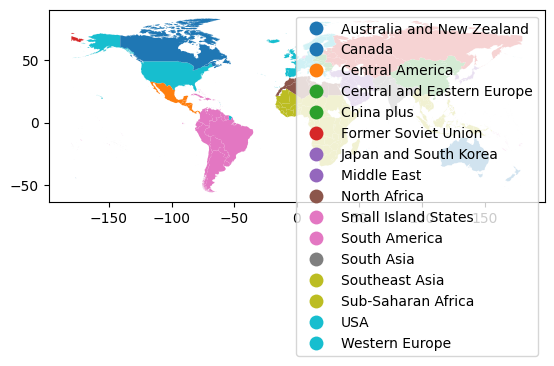

In [80]:
fund_spatial = countries.merge(fund_exploded, left_on='ADM0_A3', right_on='ISO', how='left') 
fund_spatial.plot(column='Name', legend=True)

In [79]:

vide = (fund_spatial['ISO'].isna() & fund_spatial['Name'].notna())
vide.value_counts()

False    260
Name: count, dtype: int64